Im folgenden Notebook soll die Funktion $cos(x)$ mittels einer Taylorentwicklung bis zu einem gegebenen Polynom-Grad $n$ numerisch angenähert werden.
Im Allgemeinen gilt, dass für eine Funktion $f$, welche im Punkt $a$ hinreichend oft differenzierbar ist

$$T_n(x)=\sum_{k=0}^n \frac{f^{(k)}(a)}{k!}(x-a)^k$$

das Taylor-Polynom $n$-ten Grades darstellt.\
Im vorliegenden Fall ist $f=cos(x)$ und $a=0$ (wobei der folgenden Code so geschrieben ist, dass $a$ auch beliebig anders gewählt werden könnte) und es gilt demnach

$$T_n(x)=cos(0)-\frac{sin(0)}{1!}x-\frac{cos(0)}{2!}x^2+\frac{sin(0)}{3!}x^3+\; ...$$



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time as tm
%matplotlib inline

In [2]:
#Hilfsfunktionen

def sign(n):
    '''Bestimmt das Vorzeichen des n-ten Summenelements.'''
    if n == 0:
        return 1
    elif n % 2 == 0:
        return 1 * sign(n-1)
    elif n % 2 != 0:
        return (-1) * sign(n-1)
    

def ableitung(a, n):
    '''Gibt die richtige Ableitung (cos oder sin) für das n-te Summenelement an.'''
    if n % 2 == 0: #gerade Zahl
        return np.cos(a)
    elif n % 2 !=0: #ungerade Zahl
        return np.sin(a)
    
    
def factorial(n):
    '''Gibt die Fakultät von n an.'''
    result = 1
    for i in range(1, n+1):
        result *= i
    return result

In [3]:
#Taylor-Funktion

def taylor(x, n):
    '''Berechnet das Taylor-Polynom für gegebenes n.
    :param x: int or array
    :param n: int
    '''
    taylor = 0
    for i in range(n+1):
        taylor += sign(i) * ableitung(0, i) * pow(x, i) / factorial(i)
    return taylor

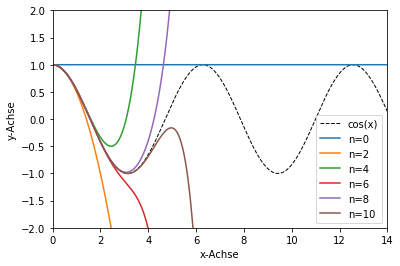

Die Berechnunsdauer für cos(x) beträgt: 0.08800172805786133 Sekunden.
Die Gesamt-Berechnunsdauer für die Taylor-Polynome beträgt: 0.03100109100341797 Sekunden. 
Daraus ergibt sich eine mittlere Laufzeit von 0.006200218200683593 Sekunden pro Polynom.


In [4]:
#Definition des x-Inputs
x = np.linspace(0, 14, 10000)

#Plot der cos(x)-Funktion mit Timer
t1 = tm.time()

y = np.cos(x)
plt.plot(x, y, '--', label = 'cos(x)', color = 'black', linewidth = 1)

laufzeit1 = tm.time()-t1

#Plot der Taylor-Funktionen für n = 0, 2, 4, ..., 10 mit Timer
t2 = tm.time()

for i in range(0, 11, 2):
    y = taylor(x, i)
    plt.plot(x, y, label = f'n={i}')

laufzeit2= tm.time()-t2
    
plt.ylim(-2, 2)
plt.xlim(0, 14)
plt.xlabel("x-Achse")
plt.ylabel("y-Achse")
plt.legend(loc="best")
plt.show()

#Ausgabe der Berechnungs-Laufzeiten der zuvor eingebauten Timer
print(f'Die Berechnunsdauer für cos(x) beträgt: {laufzeit1} Sekunden.')
print(f'Die Gesamt-Berechnunsdauer für die Taylor-Polynome beträgt: {laufzeit2} Sekunden. \nDaraus ergibt sich eine mittlere Laufzeit von {laufzeit2/5} Sekunden pro Polynom.')